In [832]:
import pandas as pd

df = pd.read_csv('boston_housing.csv')

In [833]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [834]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [836]:
df.shape

(506, 14)

In [837]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [838]:
corr = df.corr()
target_corr = corr['medv'].sort_values(ascending=False)
target_corr

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [839]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='medv', ylabel='Count'>

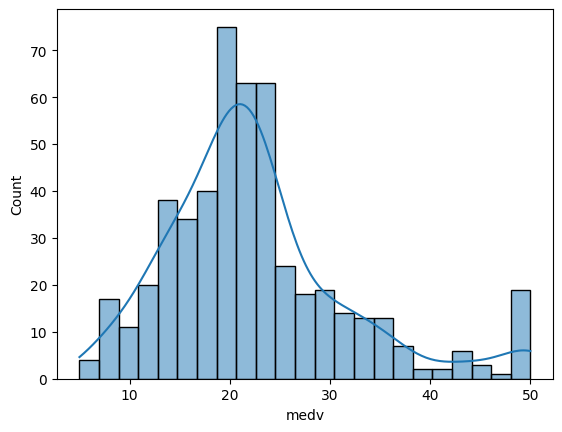

In [840]:
sns.histplot(df, x="medv", kde=True)

<Axes: xlabel='rm', ylabel='Count'>

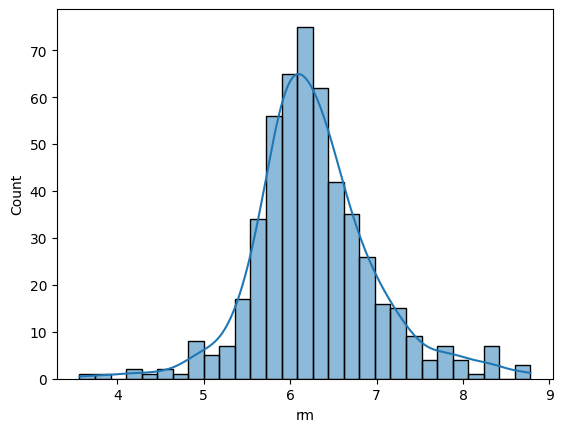

In [841]:
sns.histplot(df, x="rm", kde=True)

<Axes: xlabel='chas', ylabel='medv'>

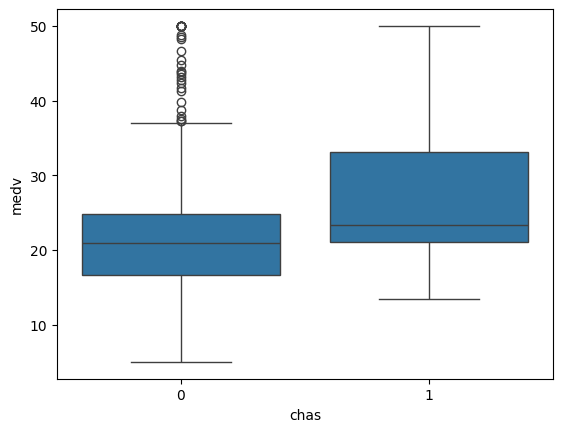

In [842]:
sns.boxplot(df, x="chas", y="medv")

In [843]:
q3 = df["crim"].quantile(0.75)
q1 = df["crim"].quantile(0.25)

df["crim_category"] = df["crim"].apply(lambda x: 3 if x > q3 else 2 if x > q1 else 1)

Text(0.5, 0, 'Crime Rate [1 = Low, 2 = Medium, 3 = High]')

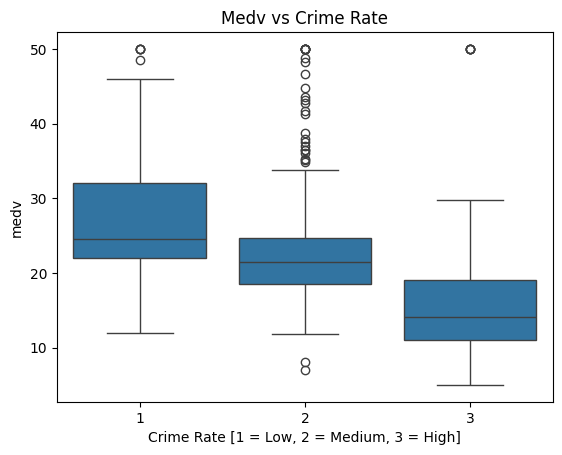

In [844]:
sns.boxplot(df,x="crim_category", y="medv")
plt.title("Medv vs Crime Rate")
plt.xlabel("Crime Rate [1 = Low, 2 = Medium, 3 = High]")

In [845]:
q3 = df["tax"].quantile(0.75)
q1 = df["tax"].quantile(0.25)

df["tax_category"] = df["tax"].apply(lambda x: 3 if x > q3 else 2 if x > q1 else 1)

In [846]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


drop_cols = ["medv", "chas", "age", "crim", "rad", "nox", "tax", "indus", "dis", "zn", "b"]
X = df.drop(columns=drop_cols).values
y = df["medv"].values

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [847]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [848]:
y_pred = model.predict(X=X_test)

<Axes: >

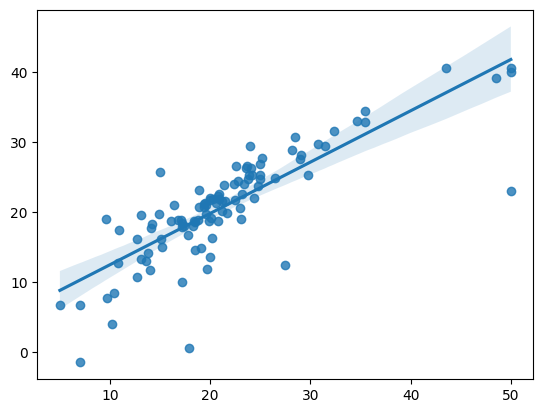

In [849]:
sns.regplot(x=y_test, y=y_pred)

In [850]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

r2 = r2_score(y_test, y_pred)


In [851]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 24.5270
Root Mean Squared Error (RMSE): 4.9525
Mean Absolute Error (MAE): 3.0662
R-squared (R²): 0.6655


In [ ]:
sns.histplot(df['b'], kde=True, bins=10)
plt.title('Distribution of Proportion of Black Residents by Town')
plt.xlabel('Proportion of Black Residents (scaled)')
plt.ylabel('Frequency')
plt.show()